# MLB Fastball Hitting Analysis

In [739]:
# import used packages
import importlib
import functions as func
import pandas as pd

In [740]:
# reload function
def reload():
    importlib.reload(func)

## 1. Data Collection and Cleaning

In [741]:
# change all txt files to csv
reload()
file_names = ["fastball", "4sf", "2sf", "cut", "92", "93-97", "98"]
for name in file_names:
    func.txt_to_csv(name)

Juan Soto has faced 2960 total pitches which is the most in the 2024 regular season. Set this as a standard, only players who have faced 50% of 2960 total pitches will be considered into this analysis.

In [742]:
# create dictionary data which contains all the qualified players data in each category
df = pd.read_csv("data/fastball.csv")
tol = 2960 * 0.5
df = df[df["total"] >= tol]
qualified_players = df["player"]

In [743]:
data = {}
for player in qualified_players:
    value = {}
    
    for file_name in file_names:
        path = "data/" + file_name + ".csv"
        df = pd.read_csv(path)
        df = df.set_index("player")
        row = df.loc[player].to_dict()
        value[file_name] = row
    
    data[player] = value

In [744]:
# search function example
reload()
func.search(data, ["Matt Olson", "Juan Soto"], "cut")

,player,pitches,total,pitches%,PA,AB,BIP,H,1B,2B,...,OBP,xOBP,SLG,xSLG,wOBA,xwOBA,Barrels,PV,EV,LA
0,Matt Olson,260.0,2947.0,8.8,66.0,59.0,47.0,18.0,11.0,4.0,...,0.364,0.333,0.525,0.398,0.379,0.333,5.0,89.7,94.0,14.0
1,Juan Soto,314.0,2960.0,10.6,73.0,60.0,53.0,17.0,8.0,2.0,...,0.397,0.453,0.650,0.677,0.435,0.481,11.0,89.9,94.2,6.0


## 2. Contact Analysis

In this part, I will analyze players' contact ability. The important variable is whiffs: when a hitter swings at a pitch but fails to make contact, it is regarded as a whiff. Moreover, batting average and related features will also be considered carefully in this part.

In [745]:
# get target datafrane
type = "fastball"
features = ["pitches", "total", "AB", "BIP", "H", "Whiffs", "Swings", "BA"]
contact_df = func.search(data = data, features = features)

In [746]:
contact_df.head()

,player,pitches,total,AB,BIP,H,Whiffs,Swings,BA
0,Jake Cronenworth,1788.0,2752.0,360.0,306.0,78.0,101.0,817.0,0.217
1,Matt Olson,1768.0,2947.0,357.0,267.0,94.0,210.0,921.0,0.263
2,Ryan McMahon,1723.0,2723.0,307.0,206.0,75.0,188.0,777.0,0.244
3,Jarren Duran,1696.0,2844.0,350.0,274.0,110.0,164.0,778.0,0.314
4,Brandon Nimmo,1696.0,2747.0,335.0,259.0,82.0,126.0,744.0,0.245


In [747]:
# create new vriables Whiffs% = Whiffs / Swings
contact_df["Whiffs%"] = contact_df["Whiffs"] / contact_df["Swings"]

In [748]:
contact_df.head()

,player,pitches,total,AB,BIP,H,Whiffs,Swings,BA,Whiffs%
0,Jake Cronenworth,1788.0,2752.0,360.0,306.0,78.0,101.0,817.0,0.217,0.123623
1,Matt Olson,1768.0,2947.0,357.0,267.0,94.0,210.0,921.0,0.263,0.228013
2,Ryan McMahon,1723.0,2723.0,307.0,206.0,75.0,188.0,777.0,0.244,0.241956
3,Jarren Duran,1696.0,2844.0,350.0,274.0,110.0,164.0,778.0,0.314,0.210797
4,Brandon Nimmo,1696.0,2747.0,335.0,259.0,82.0,126.0,744.0,0.245,0.169355


In [749]:
contact_df.describe()

,pitches,total,AB,BIP,H,Whiffs,Swings,BA,Whiffs%
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,1181.146789,2120.954128,263.908257,210.995413,70.885321,110.334862,565.770642,0.267096,0.194629
std,247.352985,397.072673,53.305319,50.046108,18.425105,41.209734,118.103886,0.033970,0.058173
min,742.000000,1495.000000,144.000000,98.000000,35.000000,23.000000,328.000000,0.196000,0.045010
25%,973.750000,1787.250000,224.250000,174.000000,57.000000,83.250000,477.250000,0.244000,0.155976
50%,1157.000000,2074.500000,259.000000,207.000000,71.000000,105.000000,558.000000,0.267000,0.194042
75%,1371.500000,2411.250000,306.000000,249.500000,83.000000,136.000000,653.250000,0.288000,0.228720
max,1788.000000,2960.000000,418.000000,409.000000,139.000000,259.000000,921.000000,0.370000,0.410431


min: 0.045, max: 0.41, mean: 0.195, sd: 0.058


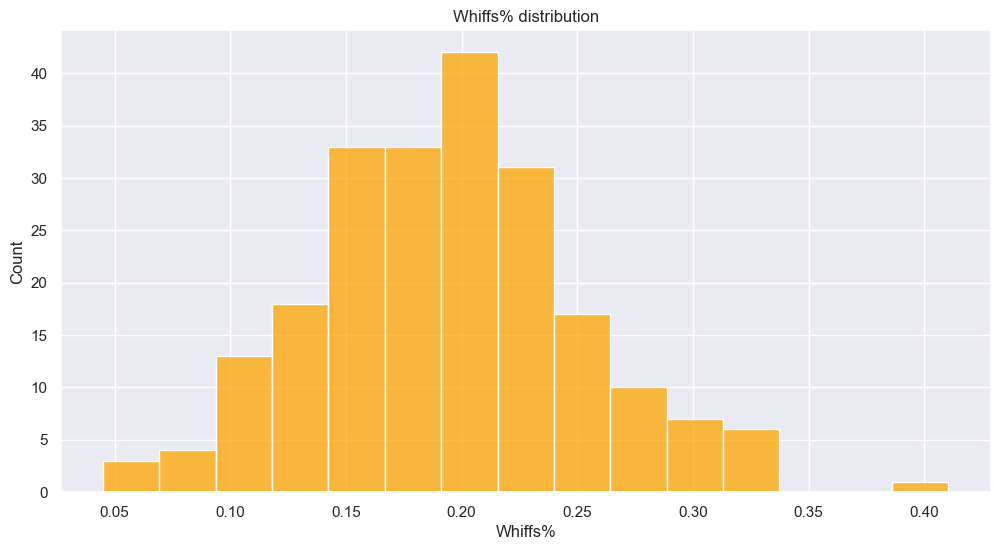

In [750]:
# Whiffs% distribution
reload()
func.dis_plot(contact_df, "Whiffs%")

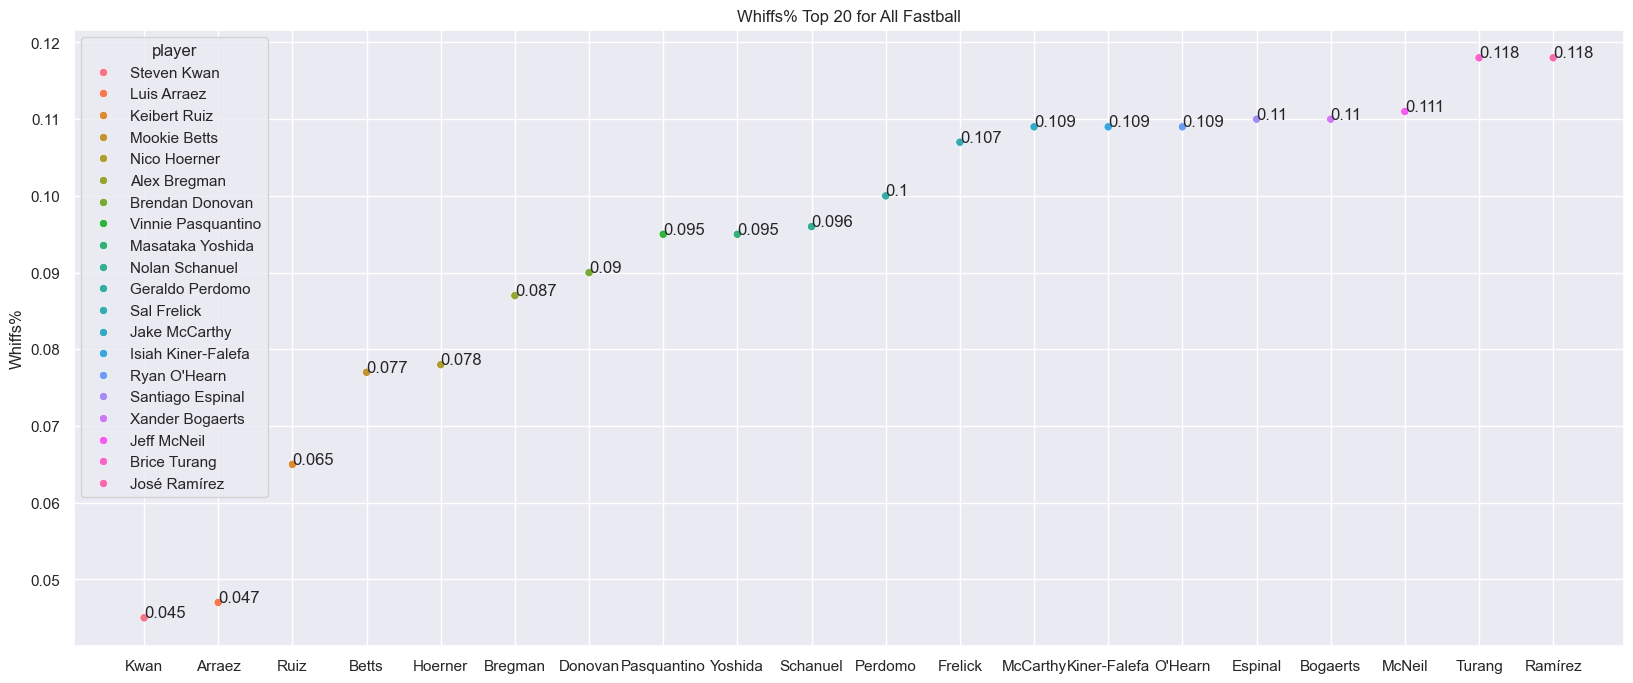

In [751]:
# visualize Whiffs%
reload()
whiff_dict = func.get_top(contact_df, "Whiffs%", 20, ascending = True)

min: 0.196, max: 0.37, mean: 0.267, sd: 0.034


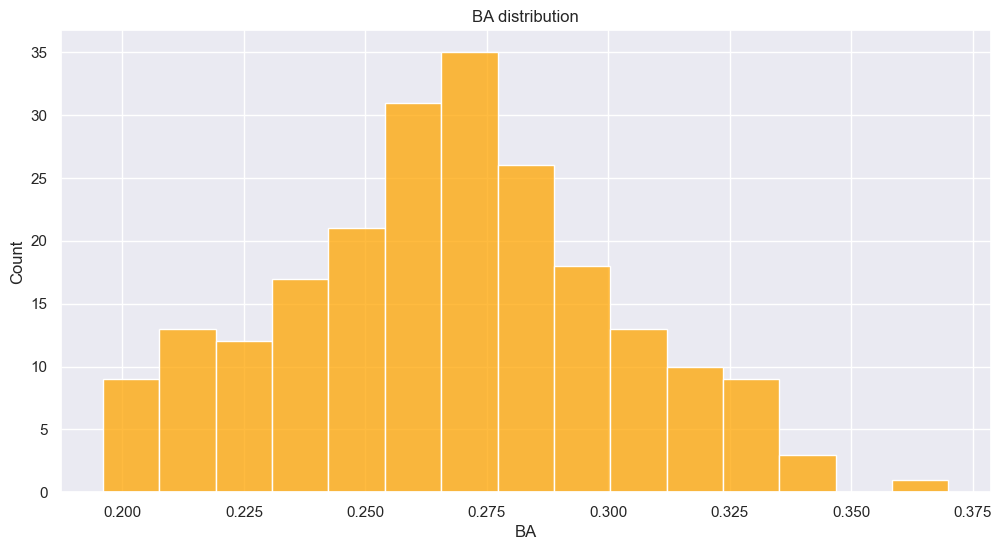

In [752]:
# BA distribution
reload()
func.dis_plot(contact_df, "BA")

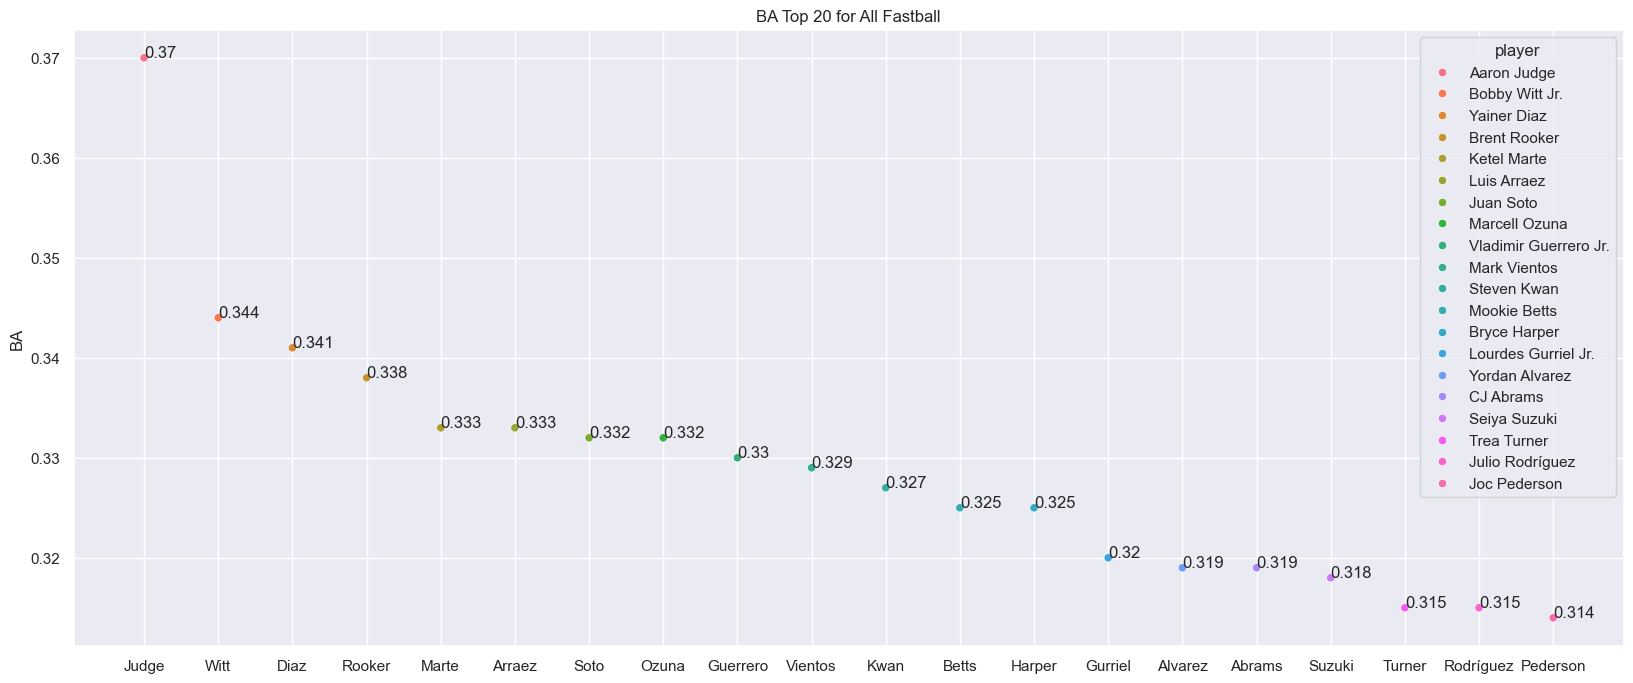

In [753]:
# visualize BA
reload()
avg_dict = func.get_top(contact_df, "BA", 20)

In [754]:
# find out which players are in both top 20 ranking in BA and Whiffs%
same_player = list(set(whiff_dict.keys()) & set(avg_dict.keys()))
same_player

['Luis Arraez', 'Steven Kwan', 'Mookie Betts']

Although the top 20 players in batting average and Whiffs% are easily found out, there are only three players who can make on both lists. Aaron Judge has the highest batting average, but he has not made in the top 20 Whiffs% list. Therefore, it is necessary to consider a players both abilities. Then I create a new feature $$ BW = \frac{\frac{BA}{\text{League Average BA}} + \frac{1 - Whiffs\%}{\text{League Average (1 - Whiffs\%)}}}{2} $$ to evaluate a player both abilities.

In [755]:
# visualize (1 - Whiffs%) - BA
reload()
contact_df["1 - Whiffs%"] = 1 - contact_df["Whiffs%"]
func.x_y_scatter(contact_df, "BA", "1 - Whiffs%", type)

In [756]:
ba_tol = np.percentile(contact_df["BA"], 75)
wh_tol = np.percentile(contact_df["1 - Whiffs%"], 75)
qualified_df = contact_df[(contact_df["BA"] >= ba_tol) & (contact_df["1 - Whiffs%"] >= wh_tol)]
qualified_df

,player,pitches,total,AB,BIP,H,Whiffs,Swings,BA,Whiffs%,1 - Whiffs%
18,Luis Arraez,1553.0,2416.0,418.0,409.0,139.0,38.0,808.0,0.333,0.047,0.953
43,Brice Turang,1435.0,2470.0,280.0,231.0,81.0,85.0,723.0,0.289,0.118,0.882
50,Nolan Arenado,1388.0,2452.0,307.0,273.0,90.0,88.0,651.0,0.293,0.135,0.865
63,José Ramírez,1322.0,2735.0,301.0,273.0,91.0,78.0,663.0,0.302,0.118,0.882
65,Yordan Alvarez,1309.0,2264.0,304.0,261.0,97.0,88.0,616.0,0.319,0.143,0.857
66,Steven Kwan,1307.0,2165.0,272.0,251.0,89.0,23.0,511.0,0.327,0.045,0.955
74,Jose Altuve,1270.0,2454.0,320.0,273.0,94.0,97.0,622.0,0.294,0.156,0.844
86,Mookie Betts,1227.0,2047.0,255.0,235.0,83.0,37.0,479.0,0.325,0.077,0.923
90,JJ Bleday,1217.0,2483.0,300.0,260.0,87.0,91.0,584.0,0.290,0.156,0.844
110,Lourdes Gurriel Jr.,1150.0,2083.0,278.0,235.0,89.0,76.0,581.0,0.320,0.131,0.869


In [757]:
print(len(qualified_df), len(qualified_df) / len(contact_df))

17 0.0779816513761468


From the above table and graph, we can see that there are only 17 players, which are only 7.8% of players in the research, could have better than league 75th percentile batting average and (1 - Whiffs%). Then we will consider BW, and if the BW is higher.

In [758]:
# create BW to the dataframe
avg_BA = contact_df["BA"].mean()
avg_WH = contact_df["1 - Whiffs%"].mean()
BW = round((contact_df["BA"] / avg_BA + contact_df["1 - Whiffs%"] / avg_WH) / 2, 3)
contact_df["BW"] = BW

min: 0.737, max: 1.215, mean: 1.0, sd: 0.082


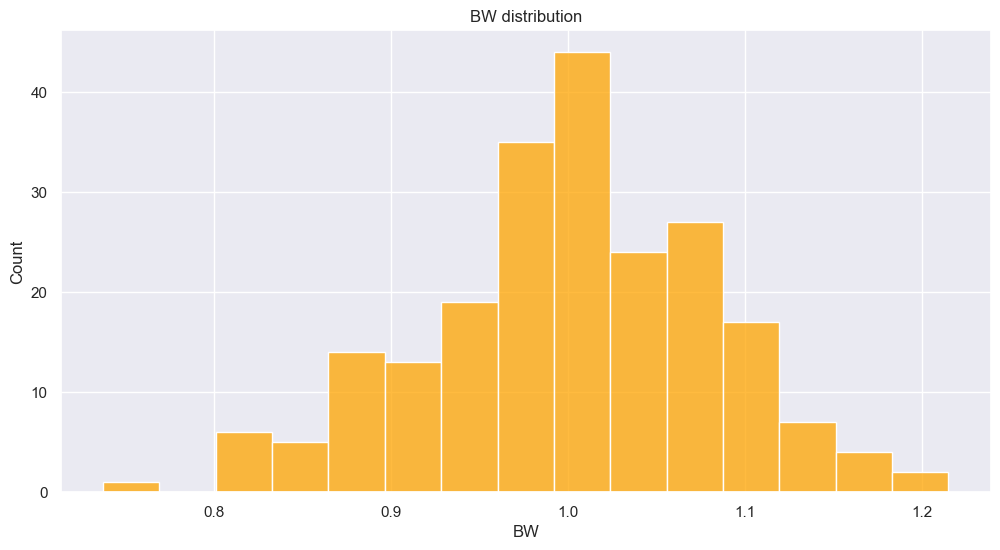

In [759]:
# BW distribution
reload()
func.dis_plot(contact_df, "BW")

/Users/briandeng/Documents/DwH/Project/MLB-Hitting-Analysis/functions.py:108: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'Luis Arraez': 1.215,
 'Steven Kwan': 1.205,
 'Mookie Betts': 1.181,
 'Aaron Judge': 1.176,
 'Ketel Marte': 1.154,
 'Bobby Witt Jr.': 1.152,
 'Masataka Yoshida': 1.14,
 'Lourdes Gurriel Jr.': 1.139,
 'Vladimir Guerrero Jr.': 1.132,
 'Juan Soto': 1.13,
 'Yordan Alvarez': 1.129,
 'Geraldo Perdomo': 1.128,
 'Yainer Diaz': 1.124,
 'Nicky Lopez': 1.115,
 'Xander Bogaerts': 1.114,
 'José Ramírez': 1.113,
 'Trea Turner': 1.109,
 'Gavin Lux': 1.106,
 'Bryce Harper': 1.103,
 'Seiya Suzuki': 1.103,
 'Luis García Jr.': 1.103,
 'Brendan Rodgers': 1.101}

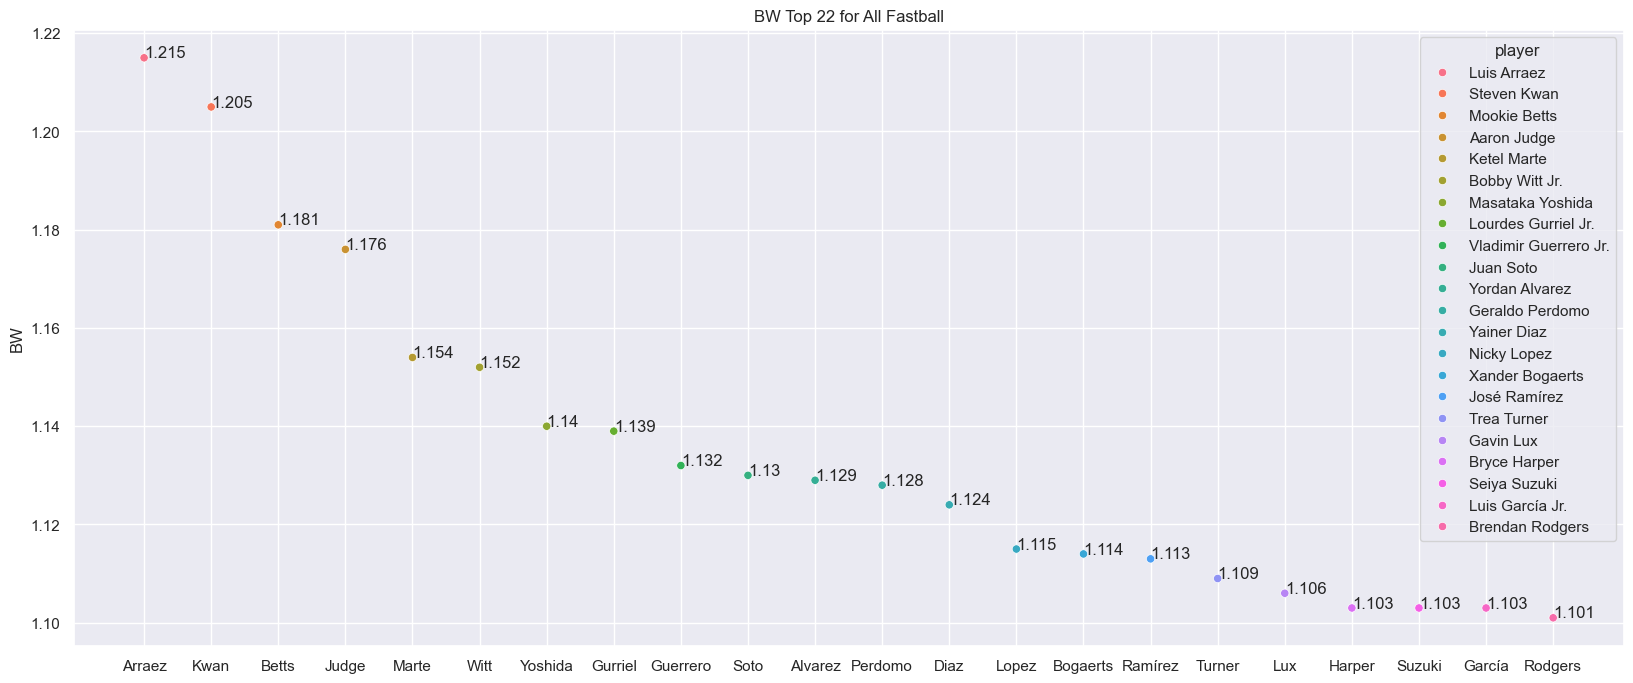

In [760]:
# get top 5% player in BW
tol = np.percentile(contact_df["BW"], 90)
qualified_df = contact_df[contact_df["BW"] >= tol]

# visualize these players
reload()
func.get_top(qualified_df, "BW")

In [761]:
# get rank information
reload()
func.get_pos(contact_df, "Aaron Judge", "Whiffs%", True)

'Aaron Judge ranks 151 out of 218 in Whiffs%'

After new variable computation, it is clear that Luis Arraez and Steven Kwan have best in BW. Luis Arraez ranks 6th in BA and 2nd in Whiffs% so it makes sense that he ranks at 1st in BW. Steven Kwan ranks 11st in BA and 1st in Whiffs% which makes him to the 2nd in BW. And another player needs to be paid attention is Aaron Judge. He ranks 1st in BA, but he ranks 151st in Whiffs%. In total, he ranks 4th in BW.

## 3. Power Analysis

To evaluate hitters' power ability, SLG, xSLG, HR, Barrels, ISO = SLG - BA will be considered into this analysis.

In [762]:
# load dataframe and create ISO, HR% = HR / AB, and Barrels% = Barrels / AB
reload()
features = ["AB", "H", "HR", "BA", "SLG", "xSLG", "Barrels"]
power_df = func.search(data = data, features = features)
power_df["ISO"] = power_df["SLG"] - power_df["BA"]
power_df["HR%"] = round(power_df["HR"] / power_df["AB"], 3)
power_df["Barrels%"] = round(power_df["Barrels"] / power_df["AB"], 3)

In [763]:
power_df.describe()

,AB,H,HR,BA,SLG,xSLG,Barrels,ISO,HR%,Barrels%
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,263.908257,70.885321,10.697248,0.267096,0.449037,0.466037,20.091743,0.181940,0.040560,0.075977
std,53.305319,18.425105,5.177948,0.033970,0.072961,0.080273,10.289847,0.056228,0.017711,0.033238
min,144.000000,35.000000,1.000000,0.196000,0.302000,0.330000,3.000000,0.071000,0.003000,0.009000
25%,224.250000,57.000000,7.000000,0.244000,0.398000,0.408000,13.000000,0.145000,0.029000,0.054000
50%,259.000000,71.000000,10.000000,0.267000,0.434000,0.453500,18.000000,0.172500,0.039000,0.074000
75%,306.000000,83.000000,14.000000,0.288000,0.483750,0.509750,26.000000,0.210750,0.050000,0.093000
max,418.000000,139.000000,33.000000,0.370000,0.759000,0.839000,72.000000,0.389000,0.104000,0.224000


In [764]:
reload()
func.x_y_scatter(power_df, "HR%", "SLG")

In [765]:
reload()
func.x_y_scatter(power_df, "Barrels%", "HR%")

In [766]:
reload()
func.x_y_scatter(power_df, "ISO", "HR%")

In [767]:
# compute correlation matrix
reload()
features = ["HR%", "SLG", "ISO", "xSLG", "Barrels%"]
func.cor_matrix(power_df, features)

,HR%,SLG,ISO,xSLG,Barrels%
HR%,1.000000,0.806042,0.946947,0.748170,0.812432
SLG,0.806042,1.000000,0.893483,0.814756,0.728495
ISO,0.946947,0.893483,1.000000,0.762678,0.819171
xSLG,0.748170,0.814756,0.762678,1.000000,0.893638
Barrels%,0.812432,0.728495,0.819171,0.893638,1.000000


From the matric and graphs above, we can all find out easily that HR%, SLG, ISO, xSLG, and Barrels% all have positive relationships. To evaluate all those features I will do the similar process as contact analysis.
$$ POA = (HR \% / LA + ISO / LA + xSLG / LA + Barrels \% / LA) / 4 $$ 
LA stands for the league average of the feature. If POA = 1, which means the player is right at league average position.

In [768]:
POA = (power_df["HR%"] / power_df["HR%"].mean() + power_df["ISO"] / power_df["ISO"].mean() + 
    power_df["xSLG"] / power_df["xSLG"].mean() + power_df["Barrels%"] / power_df["Barrels"].mean()) / 4
power_df["POA"] = POA

min: 0.314, max: 1.595, mean: 0.751, sd: 0.219


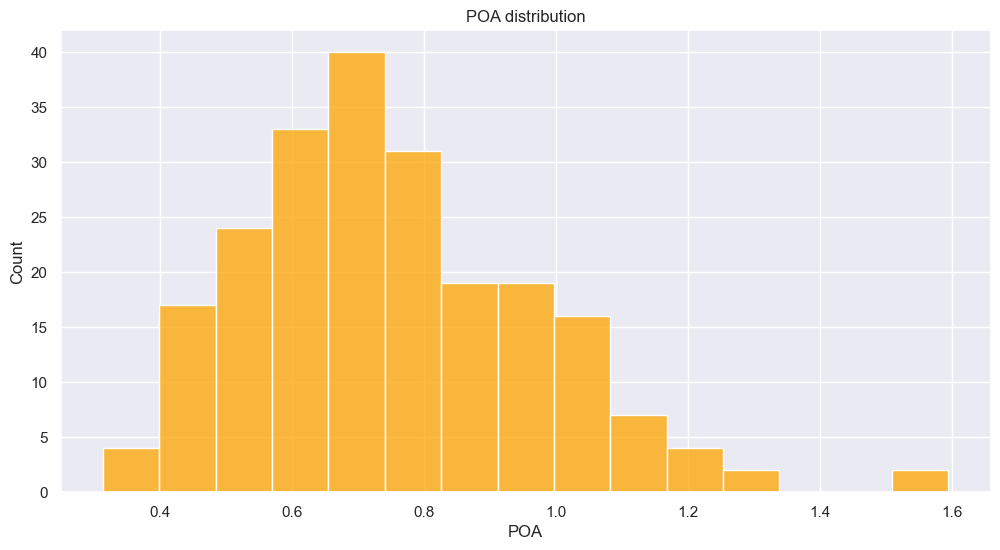

In [769]:
# visualize POA distribution
reload()
func.dis_plot(power_df, "POA")

/Users/briandeng/Documents/DwH/Project/MLB-Hitting-Analysis/functions.py:108: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'Aaron Judge': 1.595,
 'Juan Soto': 1.569,
 'Joc Pederson': 1.3,
 'Luke Raley': 1.296,
 'Ketel Marte': 1.231,
 'Mark Vientos': 1.228,
 'Michael Toglia': 1.221,
 'Brent Rooker': 1.216,
 'Brandon Lowe': 1.162,
 "Tyler O'Neill": 1.153,
 'Yordan Alvarez': 1.126}

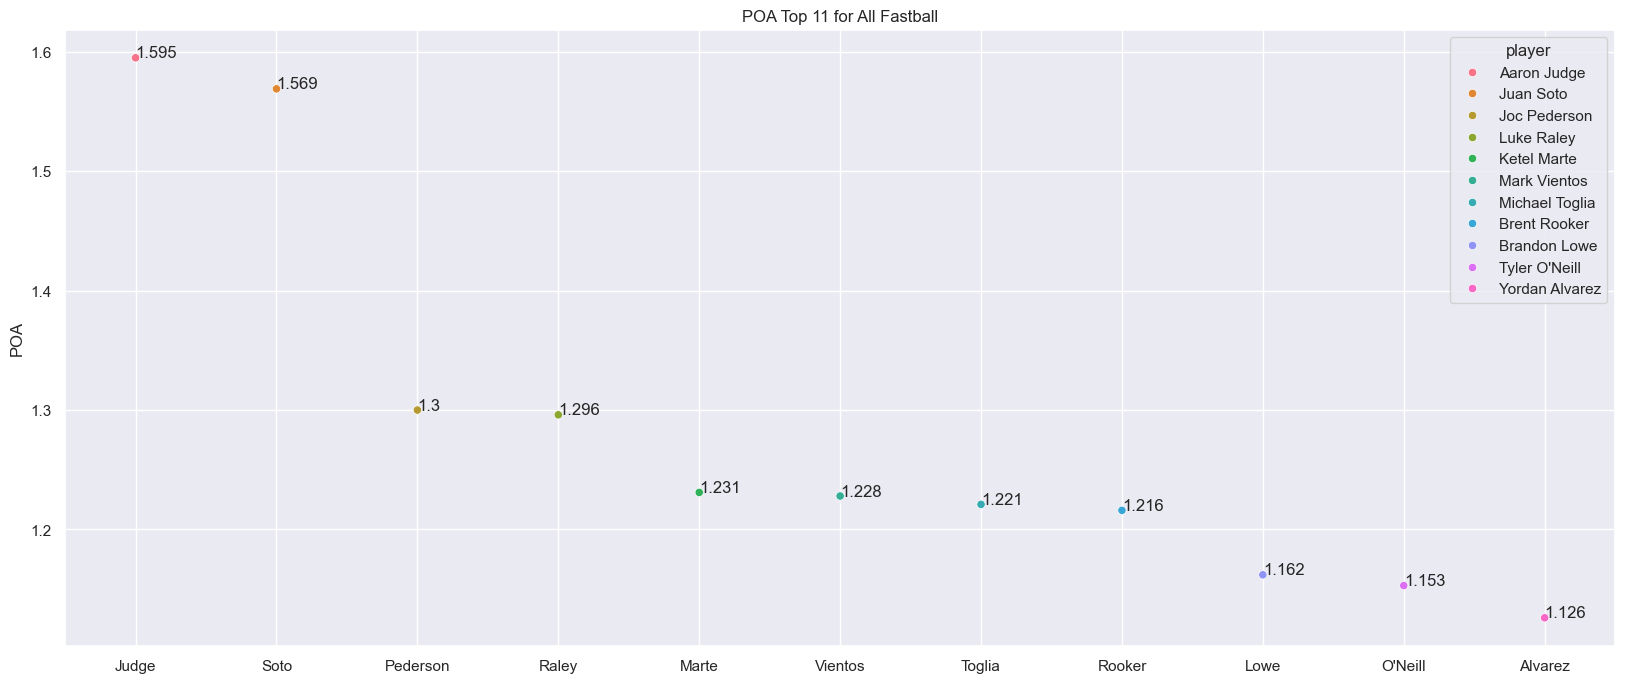

In [770]:
# get top 5% players
reload()
tol = np.percentile(power_df["POA"], 95)
qualified_df = power_df[power_df["POA"] >= tol]
func.get_top(qualified_df, "POA")

In [771]:
reload()
print(func.get_pos(power_df, "Luis Arraez", "POA"))
print(func.get_pos(power_df, "Steven Kwan", "POA"))

Luis Arraez ranks 214 out of 218 in POA
Steven Kwan ranks 117 out of 218 in POA


From the graphs above, it is easy to find out that Aaron Judge and Juan Soto these two New York Yankees superstars are very powerful when hitting fastball. And most importantly they are at a different level compared with other hitters. However, in last part Luis Arraez and Steven Kwan seem to be the best contact hitters, but speaking to power they are not really good at.

In [772]:
players = ["Luis Arraez", "Steven Kwan"]
power_df[power_df["player"].isin(players)]

,player,AB,H,HR,BA,SLG,xSLG,Barrels,ISO,HR%,Barrels%,POA
18,Luis Arraez,418.0,139.0,3.0,0.333,0.411,0.428,8.0,0.078,0.007,0.019,0.380156
66,Steven Kwan,272.0,89.0,11.0,0.327,0.493,0.417,5.0,0.166,0.040,0.018,0.698566


In [773]:
power_df.describe()

,AB,H,HR,BA,SLG,xSLG,Barrels,ISO,HR%,Barrels%,POA
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,263.908257,70.885321,10.697248,0.267096,0.449037,0.466037,20.091743,0.181940,0.040560,0.075977,0.750945
std,53.305319,18.425105,5.177948,0.033970,0.072961,0.080273,10.289847,0.056228,0.017711,0.033238,0.219047
min,144.000000,35.000000,1.000000,0.196000,0.302000,0.330000,3.000000,0.071000,0.003000,0.009000,0.313811
25%,224.250000,57.000000,7.000000,0.244000,0.398000,0.408000,13.000000,0.145000,0.029000,0.054000,0.604179
50%,259.000000,71.000000,10.000000,0.267000,0.434000,0.453500,18.000000,0.172500,0.039000,0.074000,0.714017
75%,306.000000,83.000000,14.000000,0.288000,0.483750,0.509750,26.000000,0.210750,0.050000,0.093000,0.891391
max,418.000000,139.000000,33.000000,0.370000,0.759000,0.839000,72.000000,0.389000,0.104000,0.224000,1.594960


If we look at those two players data. Luis Arraez has a below 25% HR% and Barrels%. And Steven Kwan also has a below 25% Barrels%. These make them really low in POA. In general, these two great contact players do not have same good ability to hit barrels.

## 4. Discipline

In this part, I will talk about disciplin of player when hitting fastball. It is most about evaluating walk and discipline. The most important features will be considered are Walks and Striekouts.

In [774]:
disc_df = func.search(data, features = ["AB", "SO", "K%", "BB", "BB%"])
disc_df

,player,AB,SO,K%,BB,BB%
0,Jake Cronenworth,360.0,55.0,13.2,44.0,10.6
1,Matt Olson,357.0,94.0,22.9,43.0,10.5
2,Ryan McMahon,307.0,103.0,28.9,45.0,12.6
3,Jarren Duran,350.0,78.0,19.8,39.0,9.9
4,Brandon Nimmo,335.0,77.0,19.2,58.0,14.4
...,...,...,...,...,...,...
213,Jose Miranda,208.0,25.0,10.9,15.0,6.6
214,Brandon Lowe,158.0,41.0,23.2,18.0,10.2
215,Seth Brown,202.0,49.0,22.3,15.0,6.8
216,Trevor Larnach,181.0,36.0,17.2,25.0,12.0


In [775]:
# create new feature BK = BB / K which evaluates how many strikeouts will result in a walk
disc_df["BK"] = disc_df["BB"] / disc_df["SO"]

In [776]:
func.x_y_scatter(disc_df, "BB", "SO")
print(disc_df["BB"].corr(disc_df["SO"]))

0.4060079947130533


From the graph and correlation above, we can find out that there is not a clear pattern between walk and strikeout.

In [777]:
func.x_y_scatter(disc_df, "BB%", "K%")

In [778]:
# get top 5% in BK
tol = np.percentile(disc_df["BK"], 95)
qualified_df = disc_df[disc_df["BK"] >= tol]

/Users/briandeng/Documents/DwH/Project/MLB-Hitting-Analysis/functions.py:108: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'Mookie Betts': 2.333,
 'Steven Kwan': 2.0,
 'Luis Arraez': 1.6,
 'Juan Soto': 1.346,
 'Geraldo Perdomo': 1.32,
 'Alejandro Kirk': 1.286,
 'Masataka Yoshida': 1.211,
 'LaMonte Wade Jr.': 1.162,
 'Nicky Lopez': 1.148,
 'JJ Bleday': 1.1,
 'Nico Hoerner': 1.065}

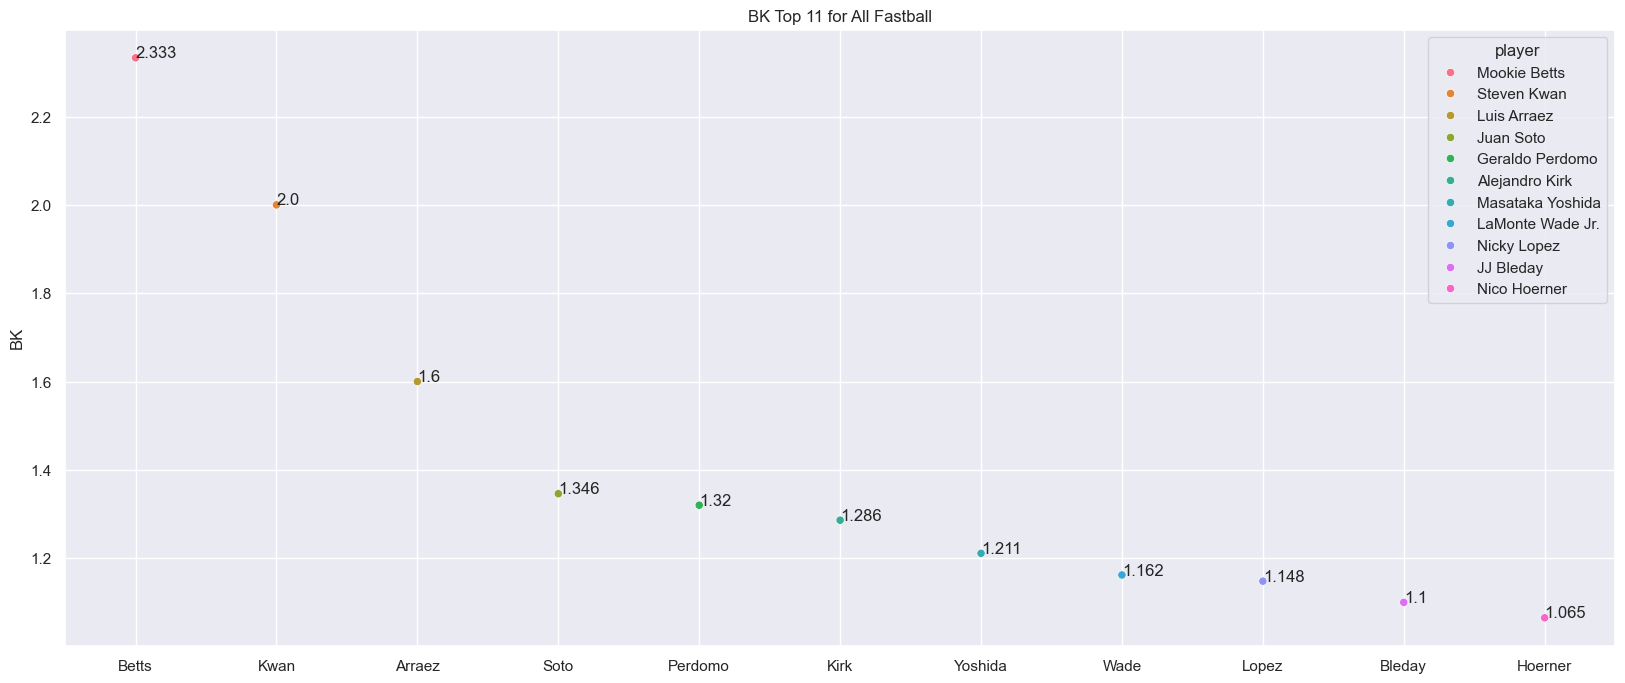

In [779]:
func.get_top(qualified_df, feature = "BK")

In [780]:
# create new variable
disc_df["DISC"] = (disc_df["BB%"] / disc_df["BB%"].mean() - disc_df["K%"] / disc_df["K%"].mean() + disc_df["BK"] / disc_df["BK"].mean()) / 3

/Users/briandeng/Documents/DwH/Project/MLB-Hitting-Analysis/functions.py:108: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'Mookie Betts': 1.695,
 'Steven Kwan': 1.425,
 'Juan Soto': 1.092,
 'LaMonte Wade Jr.': 1.011,
 'Geraldo Perdomo': 1.006,
 'Luis Arraez': 0.968,
 'Alejandro Kirk': 0.94,
 'Nicky Lopez': 0.854,
 'Masataka Yoshida': 0.835,
 'JJ Bleday': 0.822,
 'Carlos Santana': 0.791}

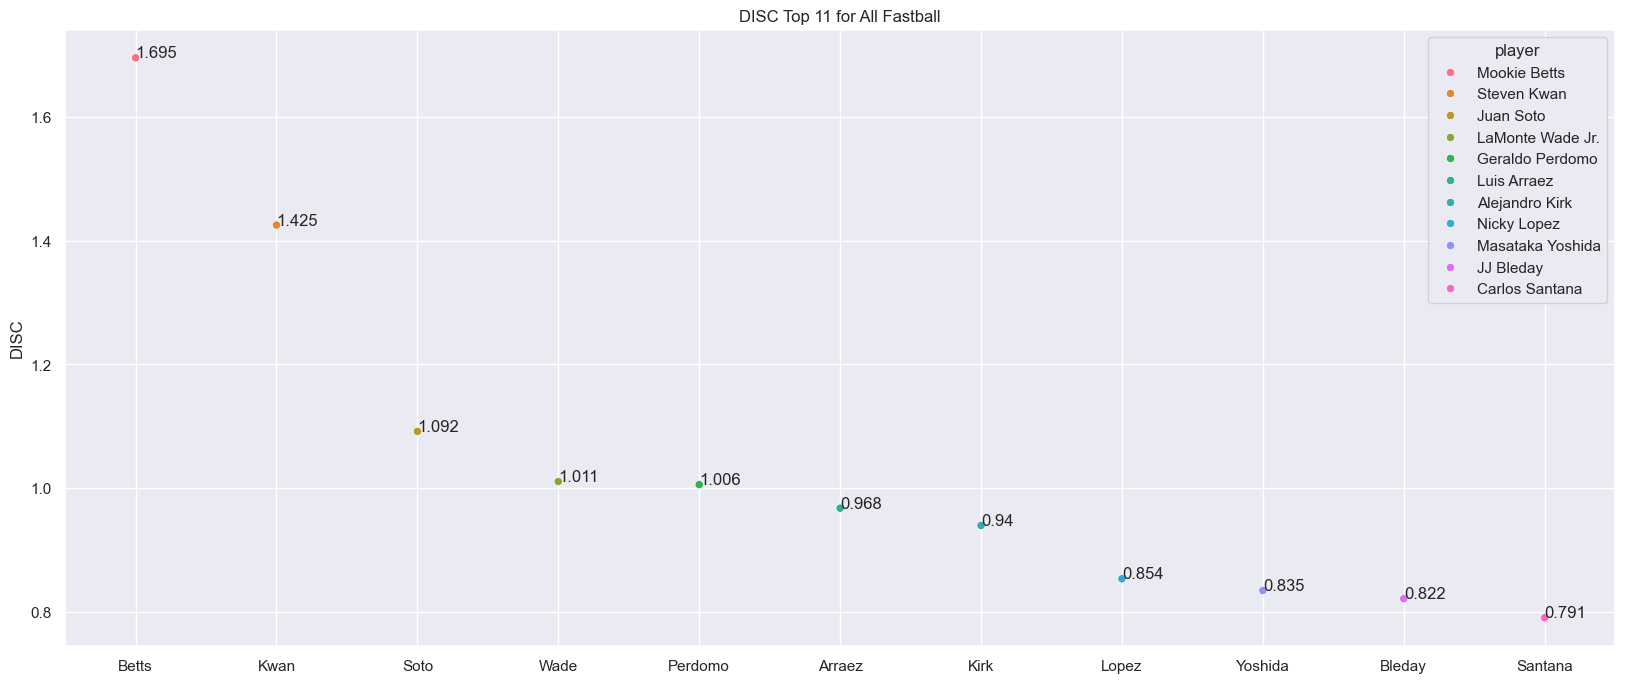

In [781]:
# get top 5
tol = np.percentile(disc_df["DISC"], 95)
qualified_df = disc_df[disc_df["DISC"] >= tol]
func.get_top(qualified_df, "DISC")

## 5. Consistancy

In this part, players performance will be evaluated in different velocity range and different pitch types.

### 5.1 Types

All fastballs are divided into three types 4-seam fastball, 2-seam fastball, and cutter.

In [782]:
col_names = ["player", "pitches", "total", "pitches%", "PA", "AB", "BIP", "H", "1B", "2B", "3B", "HR", "SO",
     "K%", "BB", "BB%", "Whiffs", "Swings", "BA", "xBA", "OBP", "xOBP", "SLG", "xSLG", "wOBA", "xwOBA", "Barrels", "PV", "EV", "LA"]
type_df = pd.DataFrame(columns = col_names)
features = col_names[1: ]

In [783]:
# create type dataframe
types = ["4sf", "2sf", "cut"]
for player in data:
    row = [player]
    for feature in features:
        lst = []
        for type in types:
            lst.append(data[player][type][feature])
        row.append(np.std(lst))
    type_df.loc[len(type_df)] = row

In [784]:
features = ["player", "BA", "xOBP", "xSLG", "EV"]
type_df = type_df[features]
type_df

,player,BA,xOBP,xSLG,EV
0,Jake Cronenworth,0.025729,0.030269,0.104324,1.532609
1,Matt Olson,0.022993,0.017556,0.078078,0.535413
2,Ryan McMahon,0.005907,0.008957,0.025962,1.400793
3,Jarren Duran,0.056405,0.036887,0.030070,1.862495
4,Brandon Nimmo,0.038387,0.043828,0.113802,1.961292
...,...,...,...,...,...
213,Jose Miranda,0.047933,0.030302,0.052360,2.808321
214,Brandon Lowe,0.029223,0.036059,0.025460,2.539029
215,Seth Brown,0.015769,0.033146,0.103695,3.002591
216,Trevor Larnach,0.067064,0.022993,0.120999,1.677962


In [785]:
type_df["CON"] = (type_df["BA"] / type_df["BA"].mean() + type_df["xOBP"] / type_df["xOBP"].mean() + type_df["xSLG"] / type_df["xSLG"].mean()
+ type_df["EV"] / type_df["EV"].mean()) / 4

/Users/briandeng/Documents/DwH/Project/MLB-Hitting-Analysis/functions.py:108: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'Tyler Stephenson': 0.364,
 'Ryan McMahon': 0.376,
 'Luis Arraez': 0.392,
 'Julio Rodríguez': 0.398,
 'Nolan Schanuel': 0.412,
 'Jeff McNeil': 0.444,
 'Marcus Semien': 0.455,
 'Spencer Steer': 0.483,
 'Andrés Giménez': 0.483,
 'MJ Melendez': 0.485,
 'Isiah Kiner-Falefa': 0.514}

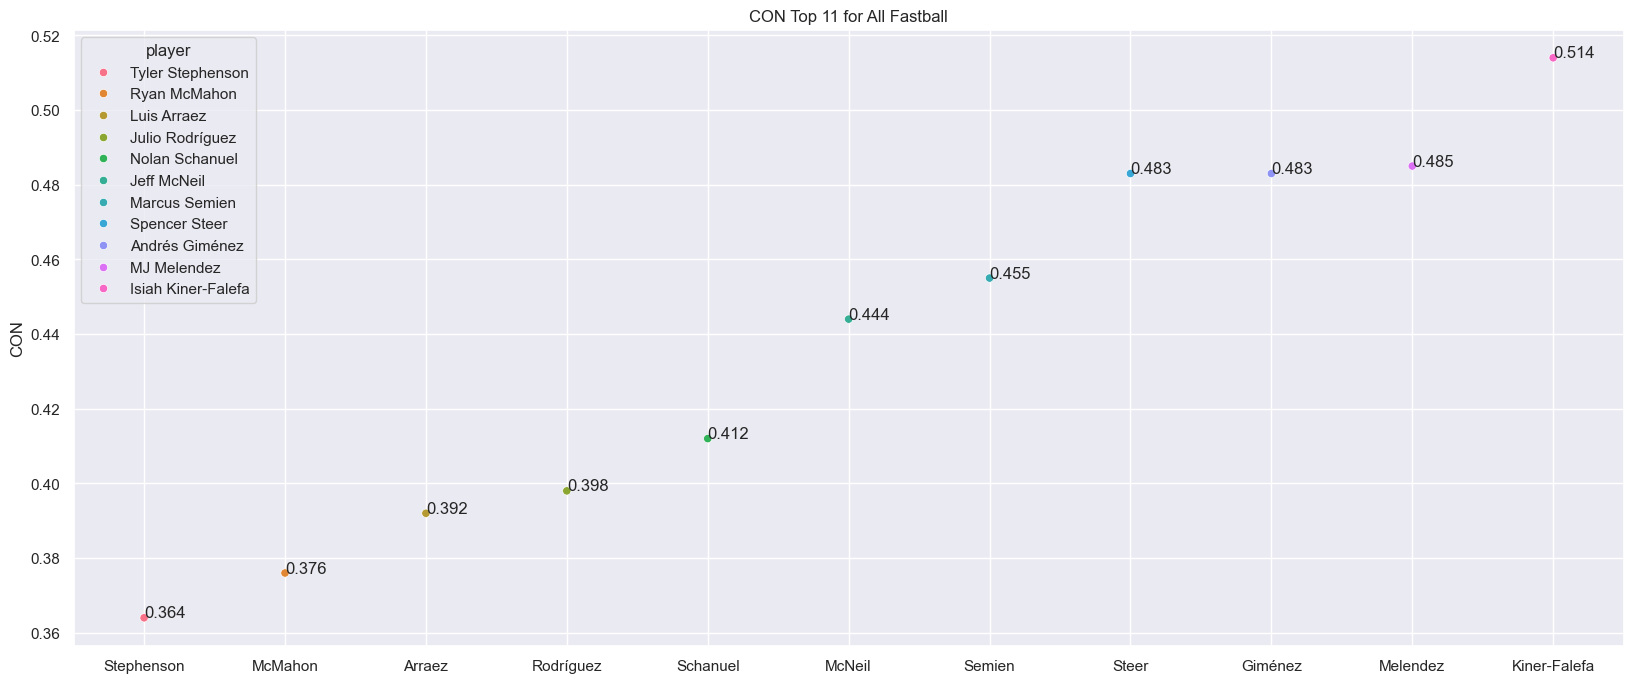

In [786]:
# get top 5%
tol = np.percentile(type_df["CON"], 5)
qualified_df = type_df[type_df["CON"] <= tol]
func.get_top(qualified_df, feature = "CON", ascending = True)

### 5.2 Pitch Velocity

In [792]:
# create velocity dataframe
v_df = pd.DataFrame(columns = col_names)
types = ["92", "93-97", "98"]
features = col_names[1: ]
for player in data:
    row = [player]
    for feature in features:
        lst = []
        for type in types:
            lst.append(data[player][type][feature])
        row.append(np.std(lst))
    v_df.loc[len(v_df)] = row

In [795]:
features = ["player", "BA", "xSLG", "xOBP", "EV"]
v_df = v_df[features]
v_df["CON"] = (v_df["BA"] / v_df["BA"].mean() + v_df["xOBP"] / v_df["xOBP"].mean() + v_df["xSLG"] / v_df["xSLG"].mean()
+ v_df["EV"] / v_df["EV"].mean()) / 4

/Users/briandeng/Documents/DwH/Project/MLB-Hitting-Analysis/functions.py:108: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'Isaac Paredes': 0.35,
 'Nolan Arenado': 0.388,
 'Luis Arraez': 0.404,
 'Nolan Schanuel': 0.42,
 'Willy Adames': 0.431,
 'Andrew McCutchen': 0.436,
 'Alex Bregman': 0.451,
 'Masyn Winn': 0.457,
 'Andrew Vaughn': 0.463,
 'Jesús Sánchez': 0.466,
 'Josh Bell': 0.47}

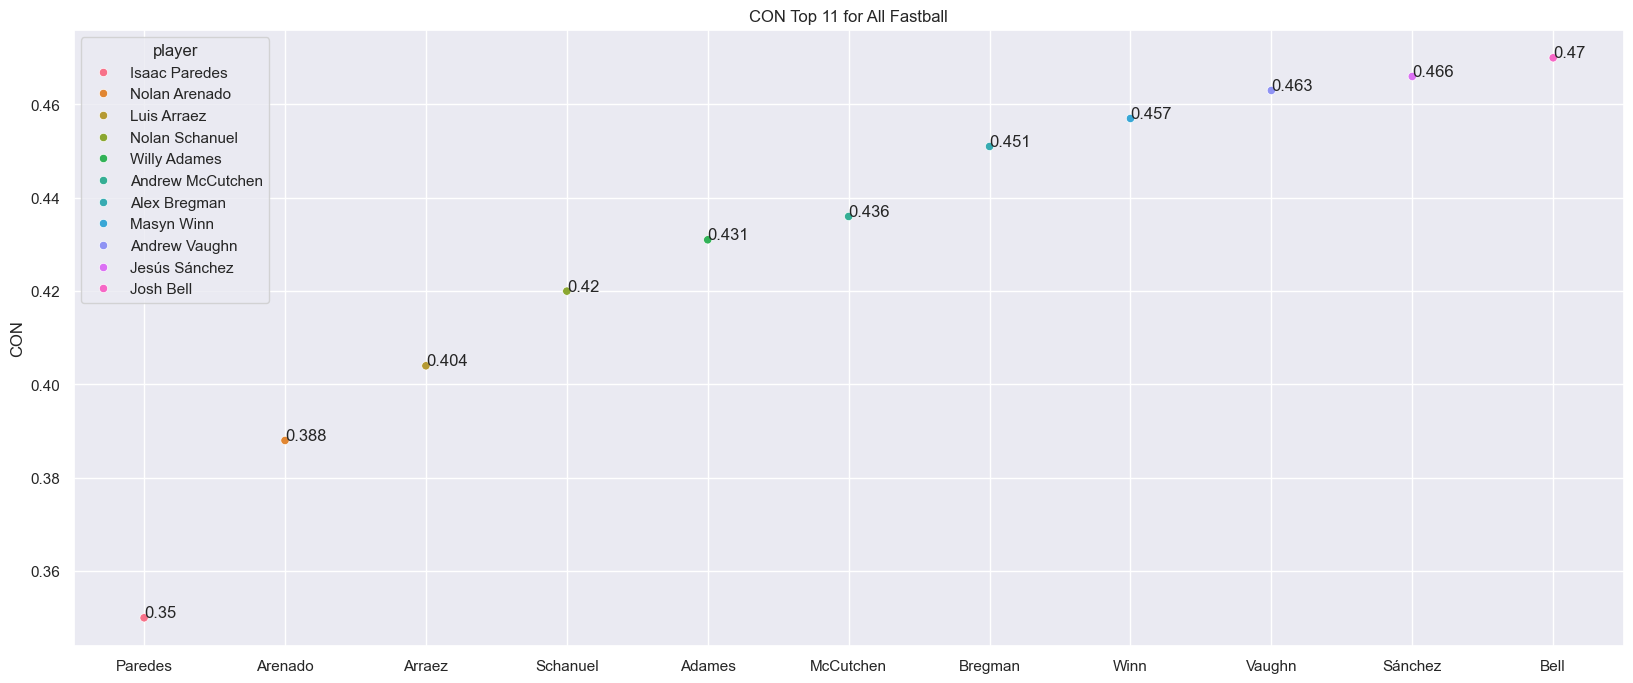

In [798]:
# get top 5%
tol = np.percentile(v_df["CON"], 5)
qualified_df = v_df[v_df["CON"] <= tol]
func.get_top(qualified_df, feature = "CON", ascending = True)

### 5.3 Types & Velocity

In [800]:
con_df = pd.DataFrame(columns = ["player", "type_con", "vel_con"])
con_df["player"] = type_df["player"]
con_df["type_con"] = type_df["CON"]
con_df["vel_con"] = v_df["CON"]

In [802]:
func.x_y_scatter(con_df, "type_con", "vel_con")

In [803]:
con_df["CON"] = (con_df["type_con"] + con_df["vel_con"]) / 2

{'Luis Arraez': 0.398,
 'Nolan Schanuel': 0.416,
 'MJ Melendez': 0.484,
 'Andrew Vaughn': 0.503,
 'Isaac Paredes': 0.504,
 'Cody Bellinger': 0.544,
 'Masataka Yoshida': 0.547,
 'Andrés Giménez': 0.554,
 'Jeff McNeil': 0.561,
 'Ryan McMahon': 0.567}

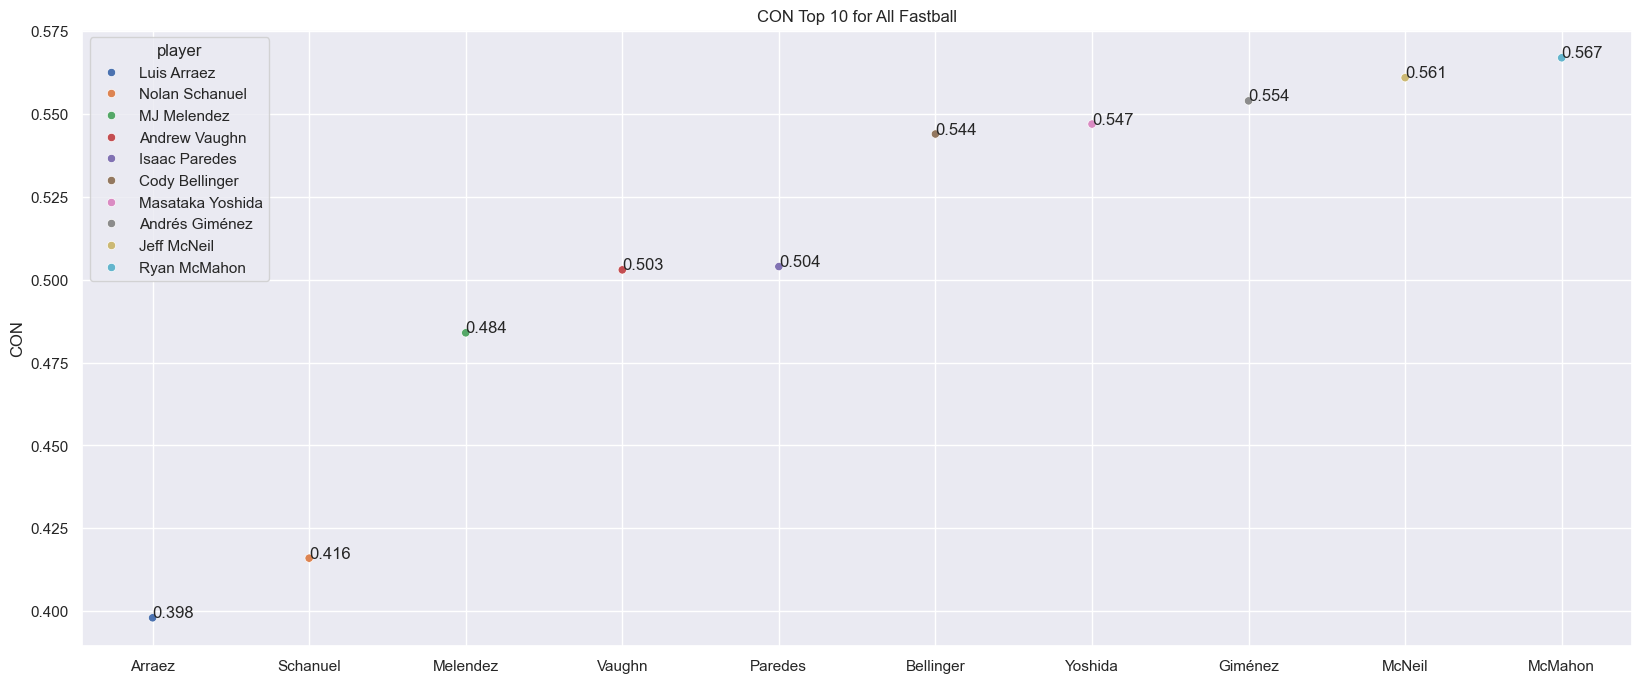

In [805]:
func.get_top(con_df, feature = "CON", num = 10, ascending = True)